# Prueba Tecnica

    Para poder realizar cada uno de los numerales deberas buscar una relacion entre las 2 tablas para consolidarlas en una sola. Posterior a esto podras empezar con la solucion de los puntos

    Nota:  
    - El punto A y B los debes solucionar tanto en Sql como python. El punto C lo podras realizar con el lenguaje de tu preferencia
    - para obtener las bases de datos solo deberas ejecutar el bloque de codigo llamado 'DATA' en caso de un error puedes pedir ayuda

In [1]:
import pandas as pd
import numpy as np
from os import path
import pandasql as ps
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist
import janitor
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

# Data

In [2]:

'''
    Barrios: Información de los barrios (nombre y código)
    clientes: Información transaccional del cliente 
    
'''

df_barrios = pd.read_csv(path.join('Bases_insumo','barrios.csv'))
df_clientes = pd.read_csv(path.join('Bases_insumo','clientes.csv'))
df_dispositivos = pd.read_csv(path.join('Bases_insumo','dispositivos.csv'))
df_dispositivos.rename({'codigo':'cod_dispositivo'}, axis = 1, inplace= True)

df_join = df_barrios.merge(df_dispositivos, left_on ='codigo', 
                          right_on = 'id_barrio', how = 'inner').merge(df_clientes, on = 'cod_dispositivo', how = 'inner')


In [3]:
df_join.head()

,codigo,nombre,tipo,cod_dispositivo,latitud,longitud,id_barrio,num_doc,tipo_doc,canal,num_trx,mnt_total_trx
0,737998257,La Campina,POS,12202503,3.479572,-76.525582,737998257,-2393994463924208659,1,POS,2,12202503.0
1,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5675531380015678594,1,POS,1,5260522.5
2,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5066077049535851626,1,POS,1,5260522.5
3,737998257,La Campina,POS,13238282,3.479491,-76.525818,737998257,-5791329717693361241,1,POS,1,6619141.0
4,737998257,La Campina,POS,12567517,3.480958,-76.525153,737998257,-397966594878551344,1,POS,1,6283758.5


# Punto a

* Generar el listado de clientes con transacciones en 5 o más barrios.

In [4]:
#Solución en sql

query = '''
    SELECT DISTINCT num_doc, sum(num_trx) as cant_transacciones, count(DISTINCT(id_barrio)) as cant_barrios
    FROM df_join
    GROUP BY num_doc
    HAVING cant_barrios > 5
    ORDER BY cant_barrios DESC;
'''

In [5]:
ps.sqldf(query, locals())

,num_doc,cant_transacciones,cant_barrios
0,-6943732889918790302,546,83
1,-6318594648243260200,307,77
2,3949050160426632961,393,75
3,956540030589798895,311,74
4,3785376175516210347,372,63
...,...,...,...
2995,-8970554719011755860,59,6
2996,-9016704368719499354,8,6
2997,-9044712566978972844,75,6
2998,-9099385232054024088,27,6


In [6]:
query_nombre_barrios = '''
    SELECT DISTINCT nombre
    FROM df_join
'''

In [7]:
conteo = df_join.groupby('num_doc')['nombre'].nunique()
conteo

docs_usuarios_5barrios = pd.DataFrame(conteo[conteo > 5])

docs_usuarios_5barrios.head()

,nombre
num_doc,
-9218698523982046880,8
-9210147727599394517,7
-9202442483227019464,6
-9202223027335988936,7
-9186693395875698210,18


In [8]:
#Mejorando Query en Pandas - post-Prueba presencial

#df_join.groupby(['num_doc', 'nombre'])['num_trx'].count().to_frame()

#df_join.groupby(['num_doc', 'nombre'])['num_trx'].aggregate(['count', 'sum'])

In [9]:
df_join.columns

Index(['codigo', 'nombre', 'tipo', 'cod_dispositivo', 'latitud', 'longitud',
       'id_barrio', 'num_doc', 'tipo_doc', 'canal', 'num_trx',
       'mnt_total_trx'],
      dtype='object')

In [10]:
#Solución en pandas



# Punto b

* ¿Cuáles son los 6 barrios donde la mayor cantidad de clientes únicos realizan transacciones en
dispositivos tipo PAC? La respuesta debe incluir la cantidad de clientes únicos asociados a estos
barrios.


In [11]:
query_3 = '''
    SELECT nombre, count(distinct(num_doc)) as clientes_unicos
    FROM df_join
    GROUP BY nombre
    ORDER BY clientes_unicos DESC
    LIMIT 6;
'''

In [12]:
ps.sqldf(query_3, locals())

,nombre,clientes_unicos
0,San Pedro,2516
1,San Vicente,1888
2,Urbanización San Juaquín,1756
3,Santa Mónica Residencial,1561
4,Chipichape,1555
5,Unidad Residencial Santiago de Cali,1547


In [13]:
cant_clientes_barrios = df_join.groupby('nombre')['num_doc'].nunique()
df_cant_clientes_barrios = pd.DataFrame(cant_clientes_barrios)
cond = df_cant_clientes_barrios.loc[:,'num_doc'] > 5
df_cant_clientes_barrios.loc[cond, :].sort_values(by = 'num_doc', ascending = False)

,num_doc
nombre,
San Pedro,2516
San Vicente,1888
Urbanización San Juaquín,1756
Santa Mónica Residencial,1561
Chipichape,1555
...,...
El Dorado,6
Unidad Residencial Bueno Madrid,6
Alto de los Chorros,6


# Punto c

Realizar analisis exploratorio de los datos y conclusiones. 

NOTA: Se debe agregar la documentación y trazabilidad del proceso realizado (Codigos y gráficas con las que se hicieron los análisis)

# **Análisis Exploratorio**

## **1. Preprocesamiento de Datos**

Conociendo el conjunto de datos:

In [14]:
df_join.head()

,codigo,nombre,tipo,cod_dispositivo,latitud,longitud,id_barrio,num_doc,tipo_doc,canal,num_trx,mnt_total_trx
0,737998257,La Campina,POS,12202503,3.479572,-76.525582,737998257,-2393994463924208659,1,POS,2,12202503.0
1,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5675531380015678594,1,POS,1,5260522.5
2,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5066077049535851626,1,POS,1,5260522.5
3,737998257,La Campina,POS,13238282,3.479491,-76.525818,737998257,-5791329717693361241,1,POS,1,6619141.0
4,737998257,La Campina,POS,12567517,3.480958,-76.525153,737998257,-397966594878551344,1,POS,1,6283758.5


In [15]:
df_join.dtypes

codigo               int64
nombre              object
tipo                object
cod_dispositivo      int64
latitud            float64
longitud           float64
id_barrio            int64
num_doc              int64
tipo_doc             int64
canal               object
num_trx              int64
mnt_total_trx      float64
dtype: object

A simple vista podemos observar que el conjunto de datos contiene el registro de transacciones realizadas en diferentes puntos de servicio de distintos barrios y los montos de las mismas.

En aras de un análisis más completo que nos permita comprender mejor el conjunto de datos surgen varios interrogantes:

*¿A qué ciudad pertenecen los barrios que aparecen en el conjunto de datos? ¿cuál es su nivel socioeconómico?*

La primera parte del análisis estará centrada en levantar la información faltante, limpiar y preparar los datos para el análisis.

**1.1 Conociendo la ciudad de los datos.**

Para este punto, partiremos de las coordenadas que contiene el dataset.

In [16]:
pip install reverse_geocoder

Note: you may need to restart the kernel to use updated packages.


In [17]:
import reverse_geocoder as rg

In [18]:
coordinate = (3.403659, -76.530091)
rg.search(coordinate) #La función rg.search devuelve un diccionario con la información de las coordenadas proporcionadas 

Loading formatted geocoded file...


[{'lat': '3.43722',
  'lon': '-76.5225',
  'name': 'Cali',
  'admin1': 'Valle del Cauca',
  'admin2': '',
  'cc': 'CO'}]

Dado que la función se aplica a Tuplas, es necesario crear una columna en el dataframe con una tupla que contenga la latitud y la longitud:

In [19]:
def obtener_ubicacion(latitud, longitud): 
    return (latitud, longitud)

In [20]:
df_join['ubicacion'] = df_join.apply(lambda df: obtener_ubicacion(df['latitud'], df['longitud']), axis = 1)

Teniendo en cuenta que la función *rg.search()* devuelve una lista que contiene un diccionario con diferentes datos de acuerdo a la ubicación, es necesario crear una función que retorne únicamente el valor de la clave *'name'* para posteriormente aplicarla a los datos.

In [21]:
def obtener_ciudad(ubicacion):
    return rg.search(ubicacion)[0]['name']

In [22]:
#df_join['ciudad'] = df_join.apply(lambda df: obtener_ciudad(df['ubicacion']), axis = 1)

 Aplicarlo al dataframe principal tiene un costo de memoria muy alto, por lo cual es necesario realizar unos pasos adicionales:

**-** Definimos un subdataframe con la información de los barrios y su ubicación

In [23]:
df_barrios_ubic = (
    df_join[['nombre', 'ubicacion']] #Subdataframe con el nombre y la ubicación del barrio
    .groupby('nombre', as_index = False) #Agrupo por nombre de barrio 
    .first() #Tomo solo la primera ubicación (todas arrojarían la misma ciudad)
)

Ahora el costo de memoria de aplicar la función *obtener_ciudad* es menor:

In [24]:
df_barrios_ubic['ciudad'] = (df_barrios_ubic
                             .apply(
                                 lambda df: obtener_ciudad(df['ubicacion']), #Aplico la función al Dataframe
                                 axis = 1  #Indico que debe iterar a través de la columna
                             )
)

df_barrios_ubic.head()

,nombre,ubicacion,ciudad
0,12 de Octubre,"(3.427925, -76.501541)",Cali
1,20 de Julio,"(3.43627671667, -76.5128989173)",Cali
2,3 de Julio,"(3.430406808, -76.5390441)",Cali
3,Acueducto San Antonio,"(3.446740019, -76.54089095)",Cali
4,Aguablanca,"(3.431530347, -76.51957472)",Cali


In [25]:
(
    df_barrios_ubic
    .ciudad
    .value_counts()
)

Cali       276
Jamundi      1
Name: ciudad, dtype: int64

In [26]:
df_barrios_ubic.query('ciudad == "Jamundi"')

,nombre,ubicacion,ciudad
187,Parcelaciones Pance,"(3.34869394999, -76.5305870537)",Jamundi


Al verificar en la web, las Parcelaciones de Pance están ubicadas en la ciudad de Cali, por lo que procedemos a corregir el dato y a confirmar que todo el conjunto de datos está centrado en la actividad de los puntos de servicio de la ciudad de Cali, información importante para el análisis.

In [27]:
cond = df_barrios_ubic.loc[:,'ciudad'] == 'Jamundi'

In [28]:
df_barrios_ubic.loc[cond, 'ciudad'] = 'Cali'

In [29]:
(
    df_barrios_ubic
    .ciudad
    .value_counts()
)

Cali    277
Name: ciudad, dtype: int64

Teniendo en cuenta que solo tenemos datos de una ciudad y, en aras de optimizar el gasto de memoria, para este ejercicio sería inoficioso hacer el merge de la ciudad con el conjunto de datos principal, por lo que omitiremos este paso.

**1.2. Conociendo la segmentación socioeconómica del conjunto de datos** 

Teniendo en cuenta que conocemos el barrio y la ciudad presentes en el conjunto de datos, puede ser de suma importancia conocer la segmentación socio-económica.

Para ello, utilizaré datos sobre *Estratificación socioeconómica según estrato, en Cali* descargados del portal [datos.gov.co](https://www.datos.gov.co/widgets/pfix-sugc)

In [30]:
estratificacion_cali = pd.read_csv('estratificacion_cali.csv')
estratificacion_cali.head()

,Código único,Barrio,Lados de manzana por estrato 1,Lados de manzana por estrato 2,Lados de manzana por estrato 3,Lados de manzana por estrato 4,Lados de manzana por estrato 5,Lados de manzana por estrato 6,Sin vivienda,Estrato moda
0,101,Terrón Colorado,84,309,-,-,-,2,43,2
1,102,Vista Hermosa,199,18,-,-,-,-,30,1
2,196,Patio Bonito,161,-,-,-,-,-,37,1
3,199,Aguacatal,209,23,4,5,1,4,59,1
4,201,Santa Rita,-,-,-,2,6,30,3,6


Teniendo en cuenta que hay diferentes estratos sociales en un barrio de acuerdo a los sectores del mismo, utilizaremos como definitivo el *Estrato moda*, es decir, el valor que más se repite.

In [31]:
estratificacion_cali.columns

Index(['Código único', 'Barrio', 'Lados de manzana por estrato 1',
       'Lados de manzana por estrato 2', 'Lados de manzana por estrato 3',
       'Lados de manzana por estrato 4', 'Lados de manzana por estrato 5',
       'Lados de manzana por estrato 6', 'Sin vivienda', 'Estrato moda'],
      dtype='object')

In [32]:
#Depuramos datos innecesarios

estratificacion_cali = estratificacion_cali[['Barrio', 'Estrato moda']]

In [33]:
#Renombramos las columnas

estratificacion_cali.columns = ['nombre', 'estrato']

In [34]:
estratificacion_cali.head()

,nombre,estrato
0,Terrón Colorado,2
1,Vista Hermosa,1
2,Patio Bonito,1
3,Aguacatal,1
4,Santa Rita,6


Realizamos el merge con el conjunto de datos principales:

In [35]:
df_join_merged = pd.merge(df_join, estratificacion_cali, on = 'nombre', how = 'left')
df_join_merged.head()

,codigo,nombre,tipo,cod_dispositivo,latitud,longitud,id_barrio,num_doc,tipo_doc,canal,num_trx,mnt_total_trx,ubicacion,estrato
0,737998257,La Campina,POS,12202503,3.479572,-76.525582,737998257,-2393994463924208659,1,POS,2,12202503.0,"(3.479572082, -76.52558242)",NaN
1,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5675531380015678594,1,POS,1,5260522.5,"(3.480516553, -76.52527472)",NaN
2,737998257,La Campina,POS,10521045,3.480517,-76.525275,737998257,-5066077049535851626,1,POS,1,5260522.5,"(3.480516553, -76.52527472)",NaN
3,737998257,La Campina,POS,13238282,3.479491,-76.525818,737998257,-5791329717693361241,1,POS,1,6619141.0,"(3.47949063002, -76.5258184734)",NaN
4,737998257,La Campina,POS,12567517,3.480958,-76.525153,737998257,-397966594878551344,1,POS,1,6283758.5,"(3.480957671, -76.52515269)",NaN


In [36]:
df_join_merged.sample(10)

,codigo,nombre,tipo,cod_dispositivo,latitud,longitud,id_barrio,num_doc,tipo_doc,canal,num_trx,mnt_total_trx,ubicacion,estrato
53349,737997005,Villa del Prado-El Guabito,DISPENSADOR,2138,3.470006,-76.486380,737997005,-843383718521949814,1,DISPENSADOR,4,4276.0,"(3.47000615, -76.48637994)",NaN
50513,737996845,Buenos Aires,DISPENSADOR,342,3.393854,-76.548712,737996845,1790302246259745285,1,DISPENSADOR,1,171.0,"(3.39385376, -76.54871181)",3
37768,737998082,Barrio Eucarístico,DISPENSADOR,2716,3.422919,-76.542669,737998082,-3846181601396181402,1,DISPENSADOR,2,2716.0,"(3.42291911, -76.54266918)",4
49369,737996834,Caldas,DISPENSADOR,3925,3.393595,-76.552530,737996834,-4177983059023293923,2,DISPENSADOR,19,37287.5,"(3.39359471, -76.55253004)",NaN
94541,738000408,Prados del Limonar,DISPENSADOR,3094,3.392324,-76.525430,738000408,-5416583173274023744,1,DISPENSADOR,1,1547.0,"(3.39232432, -76.52543034)",4
64304,737998251,San Vicente,SAI,825,3.467774,-76.527102,737998251,-8521016491914923348,1,SAI,2,825.0,"(3.46777401, -76.52710162)",4
1917,737999419,El Sena,SAI,514,3.465396,-76.501457,737999419,-944652293203170680,1,SAI,6,1542.0,"(3.46539605, -76.50145719)",3
79138,738000377,Unicentro Cali,DISPENSADOR,5762,3.373327,-76.540710,738000377,-3864461473980528986,1,DISPENSADOR,2,5762.0,"(3.37332731, -76.54071024)",5
32900,737998202,Ciudad Los Álamos,POS,10853612,3.484523,-76.512911,737998202,7821924382894937626,1,POS,2,10853612.0,"(3.484523024, -76.51291083)",NaN
55516,737998851,Ciudad Capri,DISPENSADOR,8064,3.392730,-76.544289,737998851,4251358838232561199,1,DISPENSADOR,2,8064.0,"(3.39272972, -76.54428937)",5


Analizando valores nulos.

In [37]:
(
    df_join_merged
    .isnull()
    .any()
)

codigo             False
nombre             False
tipo               False
cod_dispositivo    False
latitud            False
longitud           False
id_barrio          False
num_doc            False
tipo_doc           False
canal              False
num_trx            False
mnt_total_trx      False
ubicacion          False
estrato             True
dtype: bool

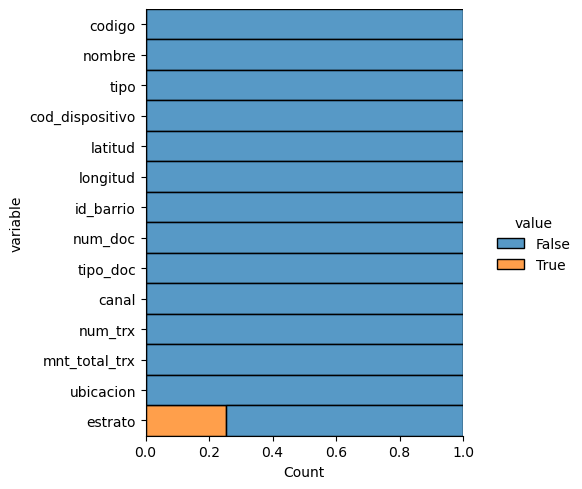

In [38]:
#Proporción de los valores nulos

(
    df_join_merged
    .isnull()
    .melt()
    .pipe(
        lambda df: sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill'
        )
    )
)

In [39]:
(
    df_join_merged
    .isnull()
    .sum()
)

codigo                 0
nombre                 0
tipo                   0
cod_dispositivo        0
latitud                0
longitud               0
id_barrio              0
num_doc                0
tipo_doc               0
canal                  0
num_trx                0
mnt_total_trx          0
ubicacion              0
estrato            23832
dtype: int64

In [40]:
23832 / df_join_merged.shape[0]

0.2518972624458303

Teniendo en cuenta que los valores representan un 25.19% de los datos, es necesario encontrar los valores faltantes, pues eliminarlos sería perder gran parte de la muestra.

In [41]:
mask = df_join_merged.loc[:,'estrato'].isnull()

In [42]:
df_join_merged.loc[mask, 'nombre'].unique()

array(['La Campina', 'El Trebol', 'Jorge Eliecer Gaitan',
       'Altos de Santa Isabel La Morelia', 'Rafael Uribe',
       'Alfonso Barberena', 'Paseo de los Almendros', 'Los Parques',
       'Departamental', 'Olaya Herrera', 'Bretana', 'Atanasio Girardota',
       'Unidad Residencial Santiago de Cali', 'La Rivera',
       'Alirio Mora Beltrán', 'Manuel María Buenventura',
       'U Dep Galindo Plaza Toros', 'León XII', 'Lleras Restrepo II',
       'Santa Bárbara', 'Los Portales-Nuevo Rey', 'Los Alcázares',
       'Canaveralejo-Seguros Patria', 'Quintas de Don Simón',
       'Guillermo León Valencia', 'Los Andes B-La Riviera',
       'San Francisco-Berlín', 'Juanambu', 'Parque de la Caña',
       '12 de Octubre', 'Siloe', 'Petecuy II', 'Canaverales Los Samanes',
       'San Luis II', 'Cuarto de Legua-Guadalupe', 'Los Comuneros I',
       'Ciudad Los Á\x81lamos', 'San Luis', 'Camino Real-Joaquín Borrero',
       'Acueducto San Antonio', 'El Á\x81ngel del Hogar',
       'U Dep Panameric

Una hipótesis acerca de la cantidad de valores nulos es que muchos de estos no entran en el merge por asuntos de tildes, mayúsculas, ñ's o, incluso, guiones, por lo que procederé a repetir el ejercicio estandarizando primero los nombres en ambas tablas.

In [43]:
def quitar_tildes(palabra):
    '''
    La función toma una palabra y la devuelve sin tildes y en formato título
    '''
    palabra = palabra.lower()
    vocales = [['á', 'a'], ['é', 'e'], ['í', 'i'], ['ó', 'o'], ['ú', 'u'], ['-', ' '], ['ñ', 'n']]
    for i,j in vocales:
        palabra = palabra.replace(i, j)
    return palabra.title()

In [44]:
df_join['nombre'] = df_join['nombre'].apply(quitar_tildes)
df_join.sample(10)

,codigo,nombre,tipo,cod_dispositivo,latitud,longitud,id_barrio,num_doc,tipo_doc,canal,num_trx,mnt_total_trx,ubicacion
35717,738000401,Belalcazar,POS,11491370,3.442750,-76.519279,738000401,-1892600834412867535,1,POS,2,1.149137e+07,"(3.44274989723, -76.5192792446)"
8574,737999403,San Fernando Viejo,POS,12504825,3.433307,-76.545798,737999403,-8024857288253197715,1,POS,3,1.875724e+07,"(3.433306811, -76.54579764)"
87875,738068452,Junin,SAI,837,3.433815,-76.527896,738068452,843458897897438475,1,SAI,1,4.185000e+02,"(3.43381531, -76.52789612)"
24308,737998266,Juanambu,DISPENSADOR,2536,3.457263,-76.534825,737998266,2576627674369528738,1,DISPENSADOR,3,3.804000e+03,"(3.45726256, -76.53482455)"
67138,737998194,Santa Monica Residencial,SAI,757,3.463546,-76.530270,737998194,3916303089435597842,1,SAI,1,3.785000e+02,"(3.463546, -76.53027)"
27346,737998119,Colseguros Andes,CB,1203621492,3.426331,-76.528000,737998119,9023719600393329138,2,CB,3,1.805432e+09,"(3.426331, -76.528)"
91922,738000400,Lili,DISPENSADOR,1669,3.369542,-76.524355,738000400,7656621507780489420,1,DISPENSADOR,2,1.669000e+03,"(3.36954236, -76.52435509)"
28387,737998935,San Nicolas,DISPENSADOR,620,3.453735,-76.525108,737998935,4846905830783228173,1,DISPENSADOR,1,3.100000e+02,"(3.45373472, -76.52510796)"
86452,737998174,Urbanizacion La Flora,SAI,836,3.486539,-76.512307,737998174,1528626824700315387,1,SAI,3,1.254000e+03,"(3.48653868, -76.51230695)"
15380,738002275,San Antonio,DISPENSADOR,8332,3.447547,-76.540518,738002275,8509552309720564238,1,DISPENSADOR,3,1.249800e+04,"(3.44754701, -76.54051835)"


In [45]:
estratificacion_cali['nombre'] = estratificacion_cali['nombre'].apply(quitar_tildes)

In [46]:
estratificacion_cali.sample(10)

,nombre,estrato
118,Chapinero,3
289,Urbanizacion Colseguros,4
353,Comuna 7,3
308,El Cortijo,2
214,Jose M. Marroquin I Etapa,2
100,San Marino,2
321,El Remanso,1
6,Arboledas,6
260,Francisco Eladio Ramirez,3
281,Urbanizacion Nueva Granada,4


In [47]:
df_join_merged_v2 = pd.merge(df_join, estratificacion_cali, on = 'nombre', how = 'left')

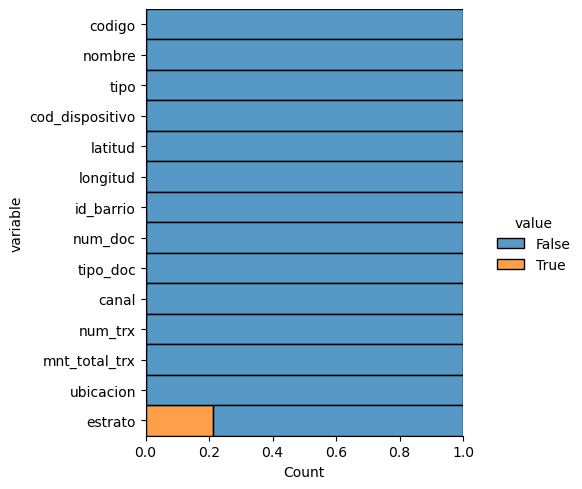

In [48]:
(
    df_join_merged_v2
    .isnull()
    .melt()
    .pipe(
        lambda df: sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill'
        )
    )
)

In [49]:
(
    df_join_merged_v2
    .isnull()
    .sum()
)

codigo                 0
nombre                 0
tipo                   0
cod_dispositivo        0
latitud                0
longitud               0
id_barrio              0
num_doc                0
tipo_doc               0
canal                  0
num_trx                0
mnt_total_trx          0
ubicacion              0
estrato            20101
dtype: int64

Al pasar los subdataframes por la función de estandarización de los nombres, se encontraron 3.700 datos (aprox.). Es necesario seguir limpiando hasta encontrar casi la totalidad de estos.

In [50]:
mask_2 = df_join_merged_v2.loc[:,'estrato'].isnull()

In [51]:
barrios_faltantes = list(df_join_merged_v2.loc[mask_2, :]['nombre'].unique())

In [52]:
barrios_faltantes.sort()

In [53]:
barrios_faltantes

['12 De Octubre',
 'Acueducto San Antonio',
 'Alfonso Barberena',
 'Alfonso Lopez I',
 'Alfonso Lopez Ii',
 'Alfonso Lopez Iii',
 'Alto Jordan',
 'Altos De Santa Isabel La Morelia',
 'Atanasio Girardota',
 'A\x81Rea Libre Parque Del Amor',
 'Bajos Ciudad Cordoba',
 'Boyaca',
 'Brisas De Los A\x81Lamos',
 'Caldas',
 'Camino Real Joaquin Borrero',
 'Camino Real Los Fundadores',
 'Canaveralejo Seguros Patria',
 'Canaverales Los Samanes',
 'Cataya El Gran Limonar',
 'Ciudad Los A\x81Lamos',
 'Ciudad Talanga',
 'Ciudadela Del Rio',
 'Ciudadela Paso Ancho',
 'Cuarto De Legua Guadalupe',
 'Departamental',
 'El A\x81Ngel Del Hogar',
 'Esmeralda',
 'Guillermo Leon Valencia',
 'Jose M. Cordoba',
 'Jose Manuel Marroquin I',
 'Jose Manuel Marroquin Ii',
 'La Ciudadela Confandi',
 'La Rivera',
 'Leon Xii',
 'Lleras Restrepo Ii',
 'Los Andes B La Riviera',
 'Los Comuneros I',
 'Los Comuneros Ii',
 'Los Parques',
 'Los Portales Nuevo Rey',
 'Los Rubles',
 'Manuel Maria Buenventura',
 'Mayapan Las Veg

Los datos faltantes se pueden deber a diferencias en la sintaxis entre los nombres de los barrios en el conjunto de datos principal y los nombres en el conjunto de datos de la estratificación descargados del portal gubernamental del Valle del Cauca. Por tal motivo, se procede a verificar y estandarizar de forma manual.

In [54]:
cond_parq_am = df_join.loc[:,'nombre'] == 'A\x81Rea Libre Parque Del Amor'

In [55]:
df_join.loc[cond_parq_am, 'nombre'] = 'Area en desarrollo Parque del Amor'

In [56]:
cond_ciud_cord = df_join.loc[:,'nombre'] == 'Bajos Ciudad Cordoba'

In [57]:
df_join.loc[cond_ciud_cord, 'nombre'] = 'Ciudad Cordoba'

In [58]:
cond_bris_al = df_join.loc[:,'nombre'] == 'Brisas De Los A\x81Lamos'

In [59]:
df_join.loc[cond_bris_al, 'nombre'] = 'Brisas de Los Alamos'

In [60]:
cond_ciud_al = df_join.loc[:,'nombre'] == 'Ciudad Los A\x81Lamos'

In [61]:
df_join.loc[cond_ciud_al, 'nombre'] = 'Ciudad Los Alamos'

In [62]:
cond_ang_hog = df_join.loc[:,'nombre'] == 'El A\x81Ngel Del Hogar'

In [63]:
df_join.loc[cond_ang_hog, 'nombre'] = 'El Angel del Hogar'

In [64]:
cond_valle_g = df_join.loc[:,'nombre'] == 'Ville Grande'

In [65]:
df_join.loc[cond_valle_g, 'nombre'] = 'Valle Grande'

In [66]:
est_cali_clean = pd.read_csv('estratificacion_cali_clean.csv')
est_cali_clean = est_cali_clean[['Barrio', 'Estrato moda']]
est_cali_clean.columns = ['nombre', 'estrato']
est_cali_clean.head()

,nombre,estrato
0,12 De Octubre,3
1,20 de Julio,3
2,3 de Julio,4
3,Aguablanca,3
4,Aguacatal,1


In [67]:
df_join['nombre'] = df_join['nombre'].apply(quitar_tildes)
est_cali_clean['nombre'] = est_cali_clean['nombre'].apply(quitar_tildes)

In [68]:
df_join_merged_v3 = pd.merge(df_join, est_cali_clean, on = 'nombre', how = 'left')

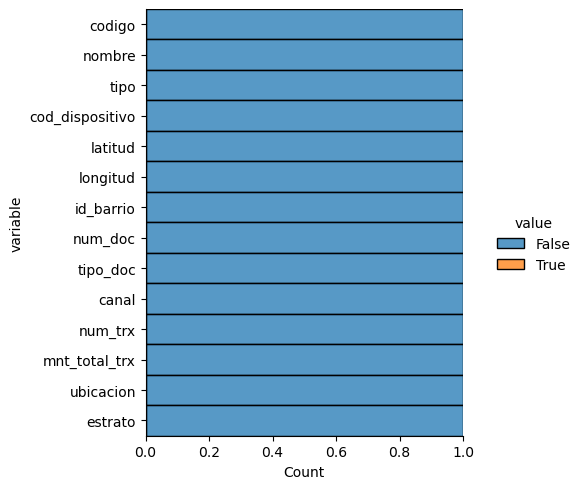

In [69]:
(
    df_join_merged_v3
    .isnull()
    .melt()
    .pipe(
        lambda df: sns.displot(
            data = df,
            y = 'variable',
            hue = 'value',
            multiple = 'fill'
        )
    )
)

In [70]:
(
    df_join_merged_v3
    .isnull()
    .sum()
)

codigo             0
nombre             0
tipo               0
cod_dispositivo    0
latitud            0
longitud           0
id_barrio          0
num_doc            0
tipo_doc           0
canal              0
num_trx            0
mnt_total_trx      0
ubicacion          0
estrato            5
dtype: int64

In [71]:
mask_4 = df_join_merged_v3.loc[:,'estrato'].isnull()

df_join_merged_v3.loc[mask_4, 'nombre'].unique()

array(['U Dep Panamericana Ant Hipodromo'], dtype=object)

In [72]:
df_join_merged_v3 = (
    df_join_merged_v3
    .dropna(
        subset = ['estrato']
    )
)


In [73]:
(
    df_join_merged_v3
    .isnull()
    .sum()
)

codigo             0
nombre             0
tipo               0
cod_dispositivo    0
latitud            0
longitud           0
id_barrio          0
num_doc            0
tipo_doc           0
canal              0
num_trx            0
mnt_total_trx      0
ubicacion          0
estrato            0
dtype: int64

Finalmente tenemos el dataset estratificado y sin valores nulos, lo que permitirá llevar a cabo el análisis.

**1.3. Depuración de variables**

Teniendo en cuenta que algunas variables pueden ser redundantes para el análisis, es importante llevar a cabo una depuración del conjunto de datos.

In [74]:
df_join_merged_v3.cod_dispositivo.nunique()

6012

El código de dispositivo puede ser útil para identificar los dispositivos con mayor actividad.

Las columnas *tipo y canal* pueden brindar información relevante respecto a los tipos de transacciones y el canal mediante el cual se realizaron. No obstante, parecen tener información duplicada y, de ser así, podemos prescindir de una de las dos variables. Miremos:

In [75]:
df_join_merged_v3.canal.unique()

array(['POS', 'CB', 'DISPENSADOR', 'SAI', 'MF', 'PAC'], dtype=object)

In [76]:
df_join_merged_v3.tipo.unique()

array(['POS', 'CB', 'DISPENSADOR', 'SAI', 'MF', 'PAC'], dtype=object)

In [77]:
(df_join_merged_v3.query('tipo != canal').shape[0] / df_join_merged_v3.query('tipo == canal').shape[0]) * 100

1.245705846469965

Si bien en una primera instancia parecía información duplicada, vemos que hay registros donde el tipo y el canal difieren,
exactamente 1164, los cuales representan un 1.24% de los datos.

In [78]:
df_join_merged_v3.query('tipo != canal').tipo.unique()

array(['SAI', 'DISPENSADOR'], dtype=object)

In [79]:
df_join_merged_v3.query('tipo != canal').canal.unique()

array(['DISPENSADOR', 'SAI'], dtype=object)

In [80]:
df_join_merged_v3.query('tipo != canal & tipo == "DISPENSADOR"').canal.unique()

array(['SAI'], dtype=object)

In [81]:
df_join_merged_v3.query('tipo != canal & tipo == "SAI"').canal.unique()

array(['DISPENSADOR'], dtype=object)

Podemos observar que en los casos donde el tipo y el canal difieren, cuando el tipo es Dispensador el canal es SAI y viceversa, por lo que podríamos inferir que son canales complementarios y prescindir de una de las columnas.

In [82]:
df_join_merged_v3.tipo_doc.unique()

array([1, 2, 4, 3, 9])

In [83]:
df_join_merged_v3.columns

Index(['codigo', 'nombre', 'tipo', 'cod_dispositivo', 'latitud', 'longitud',
       'id_barrio', 'num_doc', 'tipo_doc', 'canal', 'num_trx', 'mnt_total_trx',
       'ubicacion', 'estrato'],
      dtype='object')

In [84]:
columnas = ['codigo', 'nombre', 'cod_dispositivo', 
            'latitud', 'longitud', 'num_doc', 'tipo_doc', 'canal', 'num_trx', 'mnt_total_trx',
           'ubicacion', 'estrato']

In [85]:
(
    df_join_merged_v3[columnas]
)

,codigo,nombre,cod_dispositivo,latitud,longitud,num_doc,tipo_doc,canal,num_trx,mnt_total_trx,ubicacion,estrato
0,737998257,La Campina,12202503,3.479572,-76.525582,-2393994463924208659,1,POS,2,12202503.0,"(3.479572082, -76.52558242)",4
1,737998257,La Campina,10521045,3.480517,-76.525275,-5675531380015678594,1,POS,1,5260522.5,"(3.480516553, -76.52527472)",4
2,737998257,La Campina,10521045,3.480517,-76.525275,-5066077049535851626,1,POS,1,5260522.5,"(3.480516553, -76.52527472)",4
3,737998257,La Campina,13238282,3.479491,-76.525818,-5791329717693361241,1,POS,1,6619141.0,"(3.47949063002, -76.5258184734)",4
4,737998257,La Campina,12567517,3.480958,-76.525153,-397966594878551344,1,POS,1,6283758.5,"(3.480957671, -76.52515269)",4
...,...,...,...,...,...,...,...,...,...,...,...,...
94605,737998035,Ciudadela Del Rio,11044369,3.425455,-76.464843,-3765831630548519698,1,POS,1,5522184.5,"(3.425455055, -76.46484252)",2
94606,737998035,Ciudadela Del Rio,11044369,3.425455,-76.464843,2580778409722080163,1,POS,39,215365195.5,"(3.425455055, -76.46484252)",2
94607,737998035,Ciudadela Del Rio,11044369,3.425455,-76.464843,-6052852033626412092,1,POS,1,5522184.5,"(3.425455055, -76.46484252)",2
94608,737998035,Ciudadela Del Rio,11044369,3.425455,-76.464843,8994524193252232475,1,POS,2,11044369.0,"(3.425455055, -76.46484252)",2


## **2. Análisis**

Con el fin de llevar a cabo un análisis consistente y, teniendo en cuenta que desconocemos los valores de variables como *canales* y *tipo de documento*, es necesario hacer inferencias.

In [86]:
pd.options.display.float_format = '{:,.2f}'.format

In [87]:
df_join_merged_v3.columns

Index(['codigo', 'nombre', 'tipo', 'cod_dispositivo', 'latitud', 'longitud',
       'id_barrio', 'num_doc', 'tipo_doc', 'canal', 'num_trx', 'mnt_total_trx',
       'ubicacion', 'estrato'],
      dtype='object')

In [88]:
types = {'codigo':'int64',
         'nombre': 'category',
         'cod_dispositivo': 'int64',
         'latitud':'float',
         'longitud': 'float',
         'num_doc':'int64',
         'tipo_doc':'category',
         'canal':'category',
         'num_trx': 'int64',
         'mnt_total_trx': 'float',
         'ubicacion':'object',
         'estrato':'category'}

**2.1 Definiendo los valores para la variable *canal***

Uso de los canales:

In [89]:
(
    df_join_merged_v3
    .groupby('canal')
    ['mnt_total_trx']
    .count()
)

canal
CB              7076
DISPENSADOR    37654
MF              3386
PAC               17
POS            37062
SAI             9410
Name: mnt_total_trx, dtype: int64

<AxesSubplot:xlabel='num_trx', ylabel='canal'>

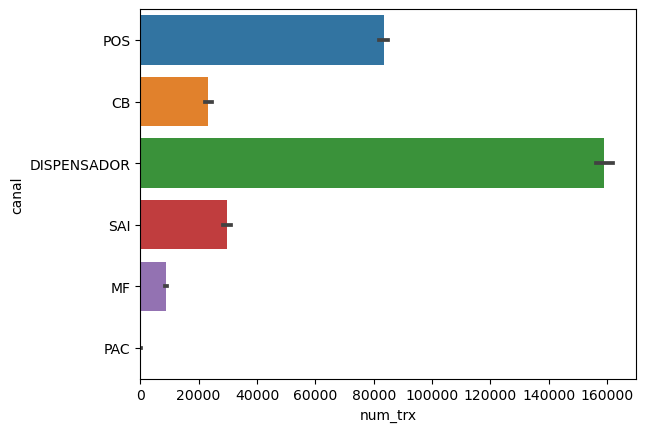

In [90]:
(
    sns.barplot(
        data = df_join_merged_v3[columnas],
        x = 'num_trx',
        y = 'canal',
        estimator = 'sum',
        #hue = 'estrato'
    )
)

En cuanto a uso, podemos observar que el canal más usado por los usuarios es el DISPENSADOR, seguido del POS, el CB y el SAI. Por último, con menos frecuencia se encuentran el MF y el PAC.

<AxesSubplot:xlabel='canal', ylabel='num_trx'>

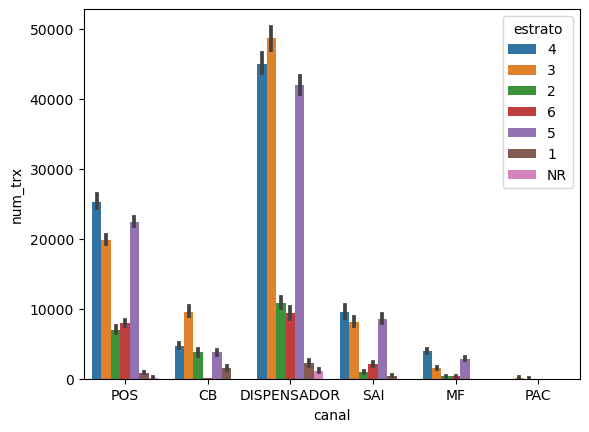

In [91]:
(
    sns.barplot(
        data = df_join_merged_v3[columnas],
        x = 'canal',
        y = 'num_trx',
        estimator = 'sum',
        hue = 'estrato'
        #hue = 'tipo_doc'
    )
)

En cuanto al uso por Estrato, podemos observar que los estratos que más usan el Dispensador son el 3, 4 y 5. Dicha tendencia se mantiene en los otros canales guardando las proporciones.

<AxesSubplot:xlabel='mnt_total_trx', ylabel='canal'>

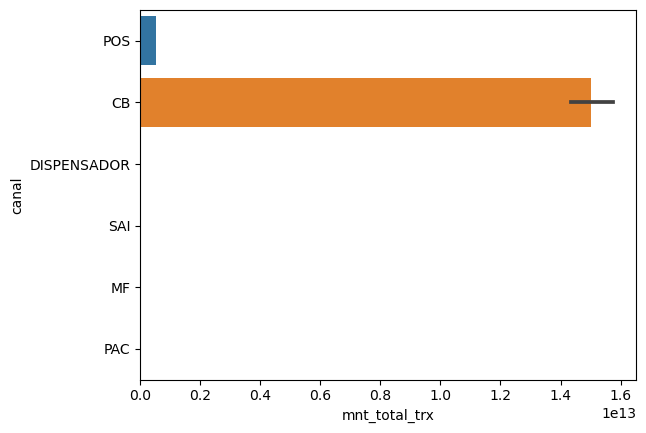

In [92]:
(
    sns.barplot(
        data = df_join_merged_v3[columnas],
        x = 'mnt_total_trx',
        y = 'canal',
        estimator = 'sum',
        #hue = 'estrato'
    )
)

In [93]:
(
    df_join_merged_v3
    .groupby('canal')
    [['num_trx', 'mnt_total_trx']]
    .sum()
    .sort_values(
        by = 'mnt_total_trx', 
        ascending = False
    )
)

,num_trx,mnt_total_trx
canal,,
CB,23295,"15,008,924,711,656.00"
POS,83393,"525,188,794,529.50"
PAC,125,"1,546,534,169.50"
DISPENSADOR,159042,"295,315,426.50"
MF,8909,"23,066,911.50"
SAI,29760,"9,815,885.50"


No obstante, la suma de los montos totales de las transacciones por canal muestran una predilección por el canal CB para transacciones grandes, seguido del POS. Los demás canales muestran unas cantidades relativamente bajas.

**Hipótesis Canales:** Para la hipótesis sobre los canales a analizar partiremos de la información analizada (en un principio).

-Si bien estudios de uso de canales bancarios de acuerdo a características demográficas, como este de (larepublica.co)[https://www.larepublica.co/consumo/cajero-automatico-el-lider-por-estratos-y-edades-en-canales-de-usuarios-bancarios-2286951] sugieren que el canal predilecto de los/as colombianos es el cajero bancario, tiene mucho más sentido que en una compañía financiera como Nequi, que surge y se fortalece desde el ámbito digital, el canal más utilizado sea la **app movil**. Por tal motivo, partiremos del supuesto que el canal dispensador hace referencia a la **App**. Esto también explica que sea el más utilizado en frecuencia pero no el superior en montos de transacciones, pues se utiliza principalmente para las transacciones pequeñas del día a día. Teniendo en cuenta esto y que anteriormente sugerimos que el canal Dispensador era complementario con el canal SAI, podemos decir que el canal SAI hace referencia al **portal_web**.

-En ese sentido, es factible que el canal que presenta las transacciones de mayor cuantía **(CB)** sea la **Caja del Banco**, pues para este tipo de transacciones le genera más seguridad a los usuarios que pueden temer cometer un error al llevar a cabo los procedimientos sin intermediación.

-Después de la **Caja del banco** en el monto total de las transacciones encontramos los canales POS y PAC. Siguiendo la misma lógica de la seguridad en las transacciones grandes cuando hay una intermediación de un tercero, podríamos decir que estos canales se refieren a los **Corresponsales Bancolombia** y los **Corresponsales Nequi**, respectivamente.

-Por último, asumiremos que el canal **MF** hace referencia a las **remesas**.

In [94]:
#Reasignando valores

(
    df_join_merged_v3[columnas]
    .assign(canal = lambda df: 
            df.canal.replace(
                ['CB', 'DISPENSADOR', 'SAI', 'POS', 'PAC', 'MF'], 
                ['caja_banco', 'app', 'portal_web','corr_bancolombia', 'corr_nequi', 'Remesas']
            )
    ).astype(types)
    .dtypes
)

codigo                int64
nombre             category
cod_dispositivo       int64
latitud             float64
longitud            float64
num_doc               int64
tipo_doc           category
canal              category
num_trx               int64
mnt_total_trx       float64
ubicacion            object
estrato            category
dtype: object

**2.2 Definiendo valores para la variable *Tipo_documento***

In [95]:
(
    df_join_merged_v3
    .groupby('tipo_doc')
    [['num_trx', 'mnt_total_trx']]
    .sum()
    .sort_values(
        by = 'mnt_total_trx', 
        ascending = False
    )
)

,num_trx,mnt_total_trx
tipo_doc,,
1,296507,"15,165,988,270,255.00"
2,7878,"369,877,904,845.50"
3,48,"96,133,890.50"
4,89,"25,928,813.00"
9,2,774.50


Teniendo en cuenta que Nequi es una entidad financiera que nace principalmente con un enfoque en las personas y posteriormente extendió sus servicios a las micro, pequeñas y medianas empresas y continúa en expansión. Asumiremos que el tipo de documento **1** hace referencia a la Cédula de ciudadanía **CC**, el 2 al **NIT** y, teniendo en cuenta que el ejercicio se realiza a modo de hpótesis, el **3** se asignará a las cédulas de extranjerías **CE**, el **4** a los pasaportes **PA** y el **9** a los documentos extranjeros **d_x**.

In [96]:
df_join_merged_v3 = (
    df_join_merged_v3[columnas]
    .assign(canal = lambda df: 
            df.canal.replace(
                ['CB', 'DISPENSADOR', 'SAI', 'POS', 'PAC', 'MF'], 
                ['caja_banco', 'app', 'portal_web','corr_bancolombia', 'corr_nequi', 'Remesas']),
            tipo_doc = lambda df:
                df.tipo_doc.replace(
                    [1, 2, 3, 4, 9],
                    ['CC', 'NIT', 'CE', 'PA', 'd_x']
                )
    ).astype(types)
)

In [97]:
df_join_merged_v3.head()

,codigo,nombre,cod_dispositivo,latitud,longitud,num_doc,tipo_doc,canal,num_trx,mnt_total_trx,ubicacion,estrato
0,737998257,La Campina,12202503,3.48,-76.53,-2393994463924208659,CC,corr_bancolombia,2,"12,202,503.00","(3.479572082, -76.52558242)",4
1,737998257,La Campina,10521045,3.48,-76.53,-5675531380015678594,CC,corr_bancolombia,1,"5,260,522.50","(3.480516553, -76.52527472)",4
2,737998257,La Campina,10521045,3.48,-76.53,-5066077049535851626,CC,corr_bancolombia,1,"5,260,522.50","(3.480516553, -76.52527472)",4
3,737998257,La Campina,13238282,3.48,-76.53,-5791329717693361241,CC,corr_bancolombia,1,"6,619,141.00","(3.47949063002, -76.5258184734)",4
4,737998257,La Campina,12567517,3.48,-76.53,-397966594878551344,CC,corr_bancolombia,1,"6,283,758.50","(3.480957671, -76.52515269)",4


In [109]:
colores_nequi = {
    'portal_web':'#20CF82',
    'app':'#210049',
    'caja_banco':'#FF598F',
    'corr_bancolombia':'#FFDB00',
    'corr_nequi':'#6991FF',
    'Remesas':'#59CBE8'
}

In [99]:
df_join_merged_v3[['num_trx', 'mnt_total_trx']].describe()

,num_trx,mnt_total_trx
count,"94,605.00","94,605.00"
mean,3.22,"164,219,525.80"
std,6.27,"1,357,456,454.46"
min,1.00,30.00
25%,1.00,"2,568.50"
50%,1.00,"20,394.50"
75%,3.00,"7,370,069.00"
max,315.00,"123,209,539,563.50"


**Comportamiento de las transacciones por estrato**

***Distribución por estrato***: Podemos observar que los clientes se distribuyen de una forma normal. El grueso de los clientes pertenecen a los estratos socioeconómicos 3, 4 y 5.

<AxesSubplot:xlabel='estrato', ylabel='count'>

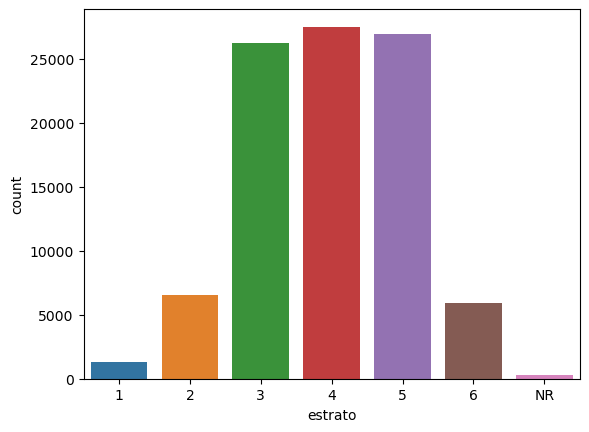

In [100]:
(
    sns.countplot(
        data = df_join_merged_v3,
        x = 'estrato'        
    )
)

Así mismo, los estratos 3, 4  y 5 se destacan como aquellos que más realizan transacciones, seguidos del estrato 2 y el 6 respectivamente.

<AxesSubplot:xlabel='estrato', ylabel='num_trx'>

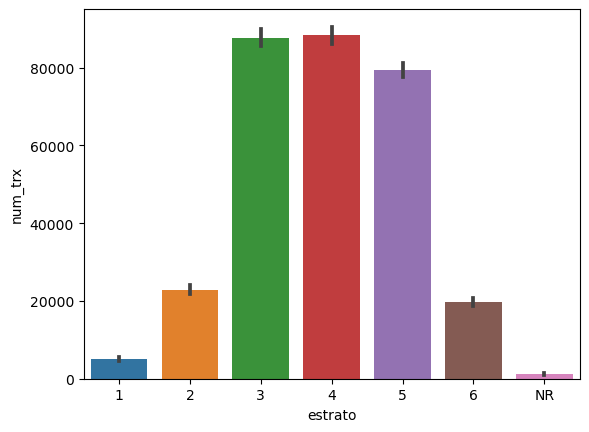

In [101]:
(
    sns.barplot(
        data = df_join_merged_v3,
        x = 'estrato',
        y = 'num_trx',
        estimator = 'sum',
        #hue = 'canal',
        #palette = colores_nequi
    )
)

<AxesSubplot:xlabel='estrato', ylabel='mnt_total_trx'>

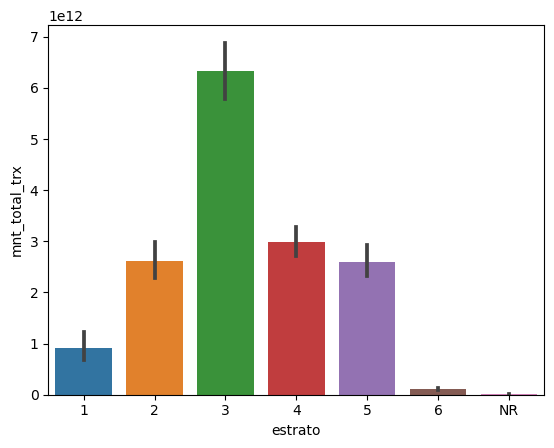

In [145]:
(
    sns.barplot(
        data = df_join_merged_v3,
        x = 'estrato',
        y = 'mnt_total_trx',
        estimator = 'sum'
    )
)

En cuanto al monto, vemos que si bien el estrato 3 es el que presenta mayor volumen en las transacciones, podemos destacar un monto importante en el estrato 2 que, con menor frecuencia de uso, se acerca a los montos totales de las transacciones realizadas por los estratos 4 y 5.

Por otro lado, visualizamos nuevamente los canales respecto al número de transacciones y monto de las mismas posterior a la asignación de las variables.

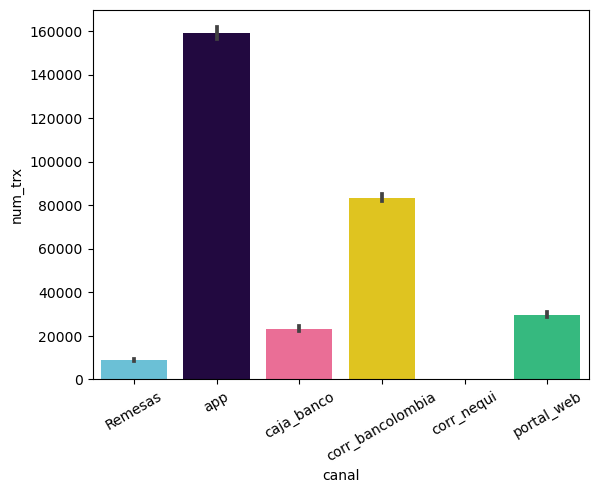

In [157]:
ax = (
    sns.barplot(
        data = df_join_merged_v3,
        x = 'canal',
        y = 'num_trx',
        estimator = 'sum',
        palette = colores_nequi
    )
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.show()

En este punto del análisis tenemos un panorama de la distribución socioeconómica de los clientes de Nequi en la ciudad de Cali y sus canales predilectos para llevar a cabo transacciones. No obstante, en aras de un análisis más riguroso con un enfoque en los dos segmentos de mercado principales de la compañía (usuarios finales y mipymes), es necesario desagregar los datos.

**2.3 Análisis transacciones - Enfoque: Barrios**

Un análisis enfocado en los barrios nos permitirá analzar la presencia de Nequi en el territorio caleño, definir aquellos barrios con mayor impacto e identificar oportunidades de mejora.


In [136]:
df_barrios = (
    df_join_merged_v3
    .groupby('nombre', as_index = False)
    [['cod_dispositivo', 'num_doc', 'canal', 'estrato', 'num_trx', 'mnt_total_trx']]
    .agg({
        'cod_dispositivo': 'count',
        'num_doc': 'count',
        'canal': 'first',
        'estrato': 'first',
        'num_trx': 'sum',
        'mnt_total_trx': 'sum'
    })
    .sort_values(
        by = 'mnt_total_trx', 
        ascending = False
    )
)

In [143]:
df_barrios.columns = ['nombre_barrio', 'cant_dispositivos', 'cant_clientes', 'canal_mayoritario', 'estrato_mayoritario', 
                      'cant_trx', 'mnt_total_trx']

In [176]:
df_barrios.head()

,nombre_barrio,cant_dispositivos,cant_clientes,canal_mayoritario,estrato_mayoritario,cant_trx,mnt_total_trx
224,San Nicolas,1383,1383,corr_bancolombia,2,4258,"837,206,014,245.00"
250,Unicentro Cali,3157,3157,corr_bancolombia,5,8595,"588,293,590,315.00"
37,Calima,447,447,corr_bancolombia,3,1162,"569,893,680,362.00"
94,El Sena,3049,3049,corr_bancolombia,3,9410,"522,368,699,294.00"
266,Versalles,659,659,corr_bancolombia,5,1343,"509,215,640,580.00"


In [144]:
df_barrios.describe()

,cant_dispositivos,cant_clientes,cant_trx,mnt_total_trx
count,275.00,275.00,275.00,275.00
mean,344.02,344.02,"1,107.36","56,494,502,685.74"
std,743.36,743.36,"2,286.95","115,768,590,293.03"
min,1.00,1.00,1.00,"5,804,911.50"
25%,12.00,12.00,30.00,"307,312,648.25"
50%,58.00,58.00,168.00,"7,651,771,673.00"
75%,260.00,260.00,"1,000.50","52,508,655,034.25"
max,"5,304.00","5,304.00","15,141.00","837,206,014,245.00"


In [167]:
df_barrios.cant_trx.quantile(q=0.100)

4.400000000000002

**2.3.1 Análisis univariado**

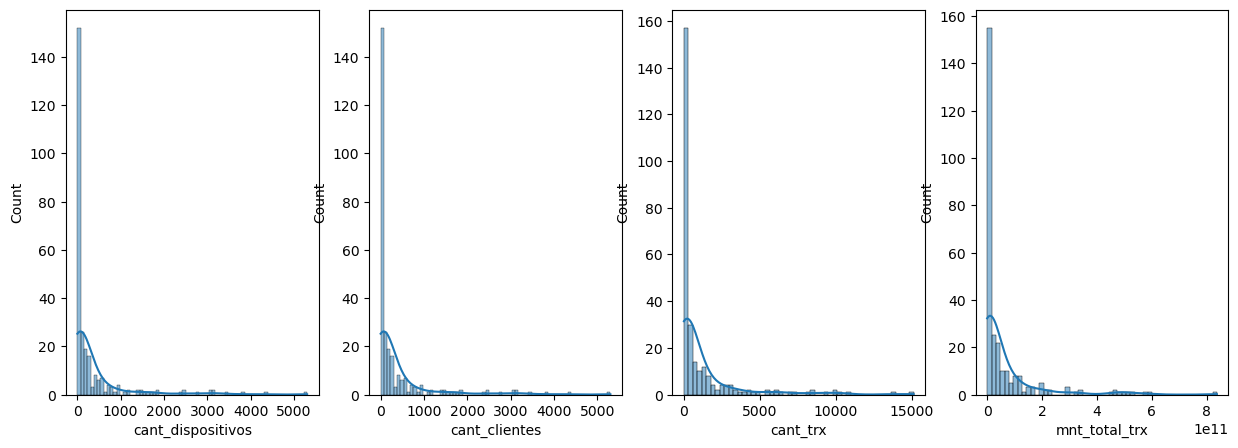

In [175]:
numeric_columns = ['cant_dispositivos', 'cant_clientes', 'cant_trx', 'mnt_total_trx']

fig, ax = plt.subplots(1, len(numeric_columns), figsize = (15, 5))

for i in range(len(numeric_columns)):
    sns.histplot(
        ax = ax[i],
        data = df_barrios,
        x = numeric_columns[i],
        kde = 'true'
    )
      

Tal como se obersva, los valores anómalos presentes en el conjunto de los datos dificulta el análisis del comportamiento de las variables, por lo que procedemos a eliminarlos.

In [180]:
Q1 = df_barrios.quantile(q=0.25)
Q3 = df_barrios.quantile(q=0.75)

IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [185]:
df_barrios_sin_outliers = df_barrios[numeric_columns][(df_barrios[numeric_columns] >= lim_inf) & (df_barrios[numeric_columns] <= lim_sup)].dropna()

In [186]:
df_barrios_sin_outliers

,cant_dispositivos,cant_clientes,cant_trx,mnt_total_trx
221,68.00,68.00,254.00,"130,794,089,513.50"
64,75.00,75.00,239.00,"125,634,395,251.50"
54,488.00,488.00,"1,651.00","122,308,004,731.50"
120,534.00,534.00,"1,831.00","120,364,950,525.50"
32,234.00,234.00,583.00,"118,469,149,495.50"
...,...,...,...,...
229,1.00,1.00,1.00,"7,293,830.50"
16,1.00,1.00,1.00,"7,053,813.50"
61,1.00,1.00,1.00,"7,019,287.00"
21,1.00,1.00,1.00,"5,962,597.50"


In [189]:
df_barrios_sin_outliers.describe()

,cant_dispositivos,cant_clientes,cant_trx,mnt_total_trx
count,220.00,220.00,220.00,220.00
mean,91.89,91.89,307.44,"20,165,486,049.15"
std,129.87,129.87,470.18,"32,110,686,071.27"
min,1.00,1.00,1.00,"5,804,911.50"
25%,8.00,8.00,18.75,"161,350,456.88"
50%,33.00,33.00,80.00,"2,117,050,356.50"
75%,118.50,118.50,368.00,"26,586,304,060.75"
max,598.00,598.00,"2,142.00","130,794,089,513.50"


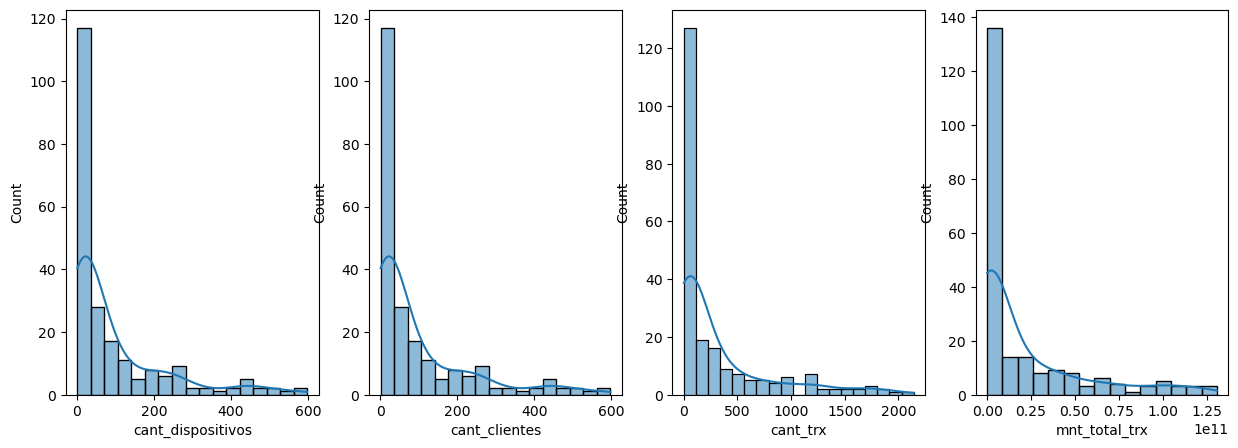

In [193]:
numeric_columns = ['cant_dispositivos', 'cant_clientes', 'cant_trx', 'mnt_total_trx']

fig, ax = plt.subplots(1, len(numeric_columns), figsize = (15, 5))

for i in range(len(numeric_columns)):
    sns.histplot(
        ax = ax[i],
        data = df_barrios_sin_outliers,
        x = numeric_columns[i],
        kde = 'true',
        #stat = 'probability'
    )

Incluso después de la eliminación de outliers, vemos que las distribuciones están fuertemente sesgadas a la derecha y los valores están muy dispersos respecto a su media. Eso quiere decir que los las cantidades altas de clientes, dispositivos y transacciones se encuentran concentradas en pocos barrios. Identificarlos también es importante para el análisis.

En este caso de sesgo en los datos, la variable que más nos puede servir para comprender el comportamiento normal de las variables es la mediana.

In [195]:
df_barrios.median(numeric_only = True)

cant_dispositivos              58.00
cant_clientes                  58.00
cant_trx                      168.00
mnt_total_trx       7,651,771,673.00
dtype: float64

Teniendo en cuenta esto, podemos decir que un comportamiento esperado por barrio promedio en Cali es que tenga 58 clientes, misma cantidad de dispositivo, 168 transacciones y un movimiento de 7.6 billones de pesos en el lapso analizado. No obstante, dado que la densidad de los barrios puede difererir en gran medida, estas cantidades pueden verse muy alteradas.

**2.3.2 Análisis Multivariado**

Saber cómo se relacionan las variables entre sí nos permitirá entender más a fondo el comportamiento de los datos y definir variables para asignar categorías y segregar los barrios con fines estratégicos sin redundar en los procesos.

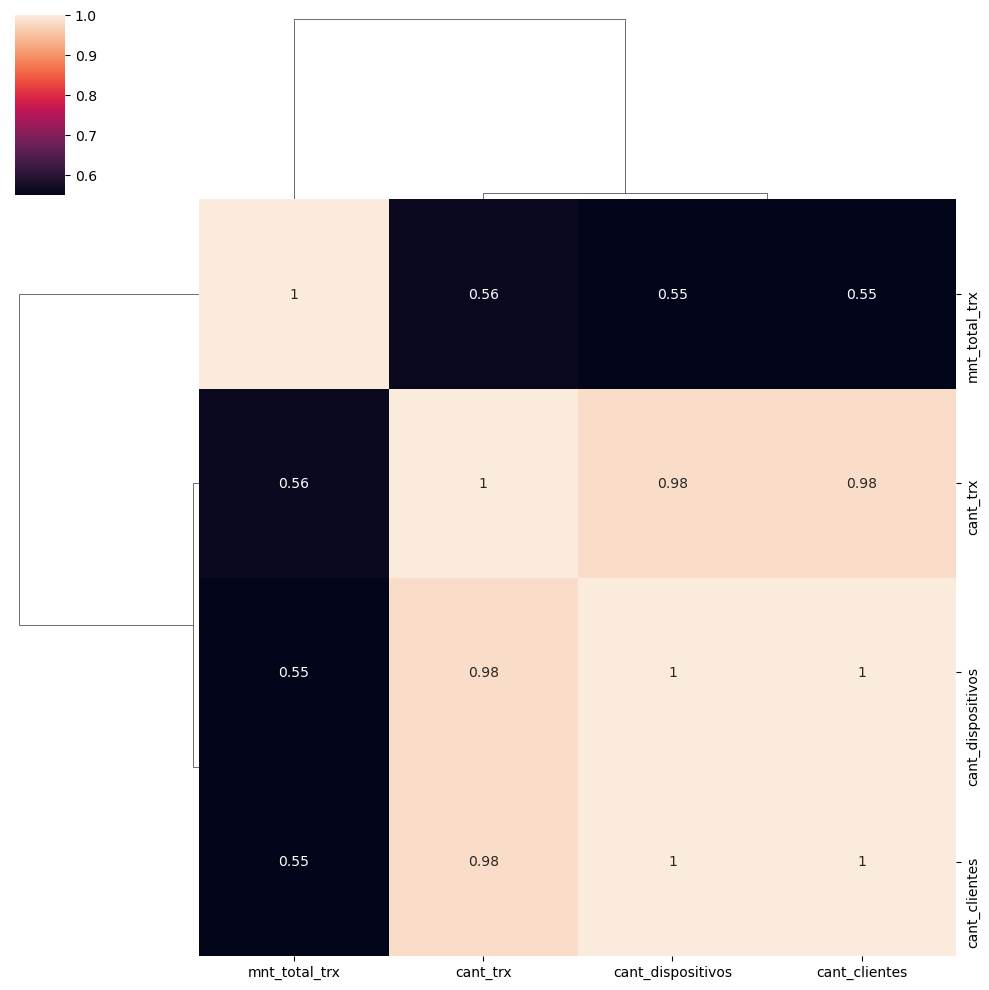

In [206]:
(
    sns.clustermap(
        data = df_barrios.corr(),
        annot = True
    )
)

In [209]:
#En cifras

df_barrios.corr()

,cant_dispositivos,cant_clientes,cant_trx,mnt_total_trx
cant_dispositivos,1.00,1.00,0.98,0.55
cant_clientes,1.00,1.00,0.98,0.55
cant_trx,0.98,0.98,1.00,0.56
mnt_total_trx,0.55,0.55,0.56,1.00


Tal como podemos observar, hay variables fuertemente relacionadas como la cantidad de clientes con la cantidad de transacciones y, a su vez, con la cantidad de dispositivos. Podemos ver esto más en detalle en los siguientes gráficos.

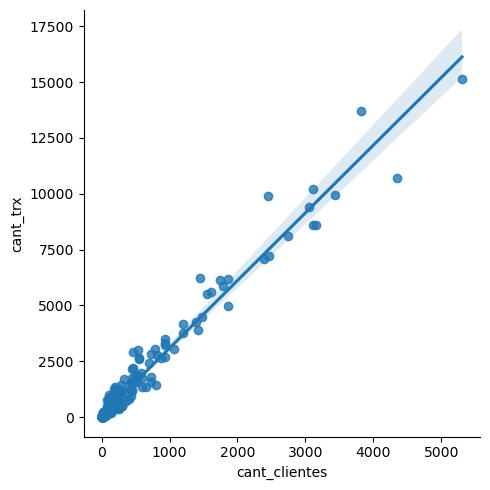

In [216]:
(
    sns.lmplot(
        data = df_barrios,
        x = 'cant_clientes',
        y = 'cant_trx',
    )
)

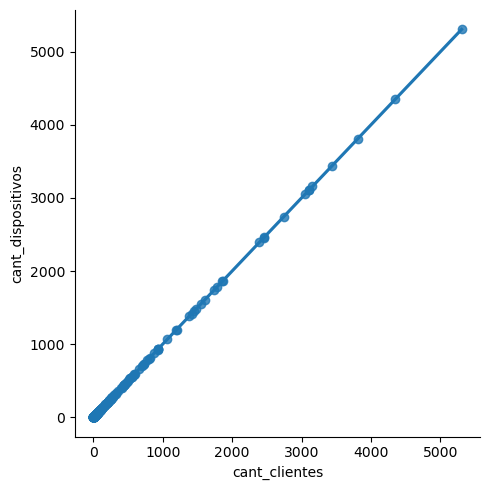

In [218]:
(
    sns.lmplot(
        data = df_barrios,
        x = 'cant_clientes',
        y = 'cant_dispositivos'    
    )
)

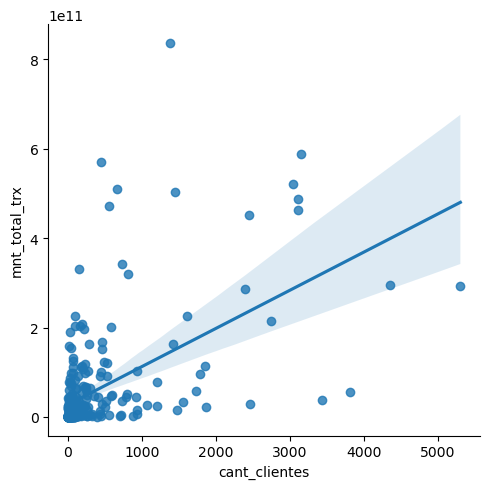

In [223]:
(
    sns.lmplot(
        data = df_barrios,
        x = 'cant_clientes',
        y = 'mnt_total_trx'
    )
)

Tal como podemos observar, confirmamos que la variable que mide el monto total de las transacciones no muestra una correlación con la cantidad de clientes y, por lo tanto, tampoco con la cantidad de transacciones y/o dispositivos.

Podemos observar el resumen gráfico:

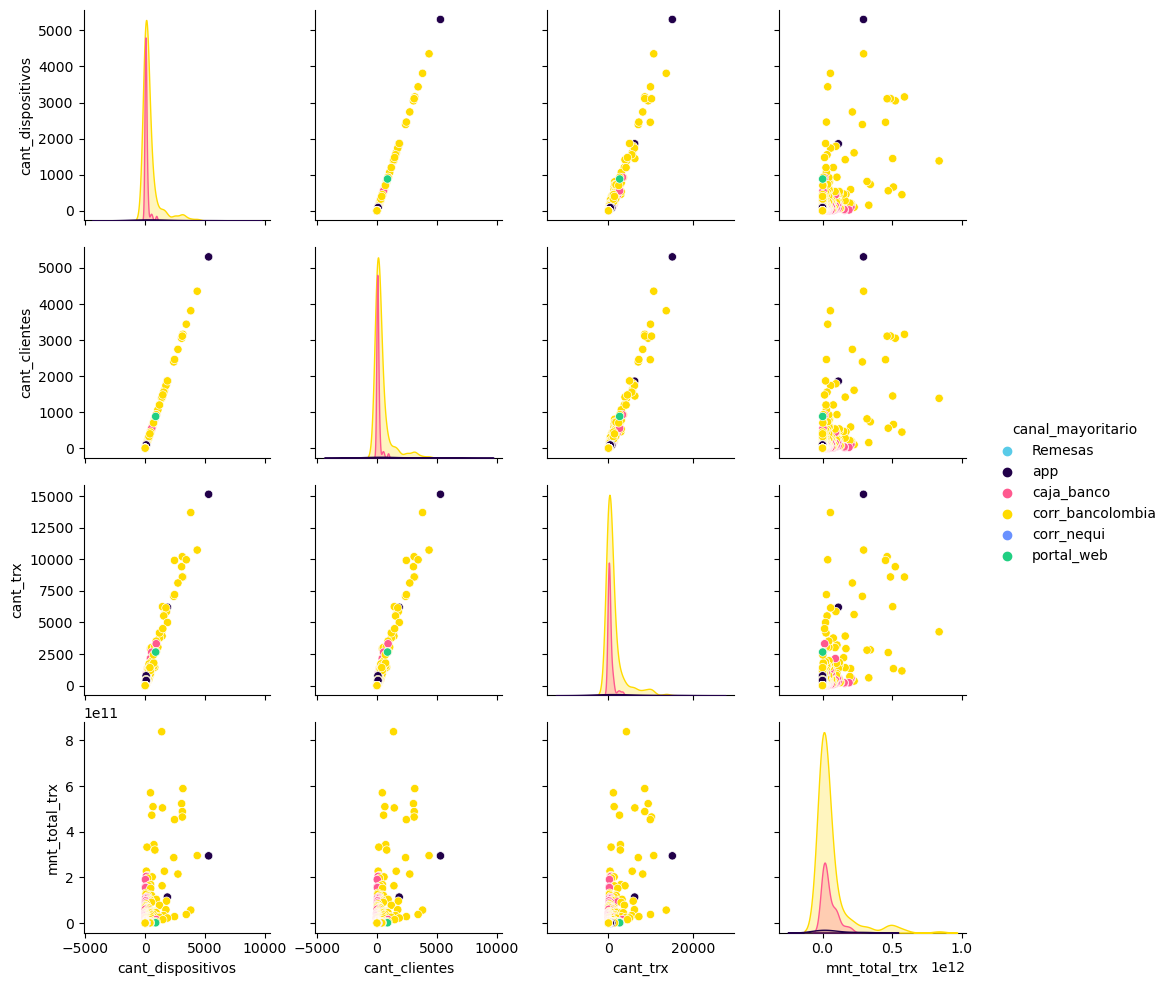

In [192]:
(
    sns.pairplot(
        data = df_barrios,
        hue = 'canal_mayoritario', 
        palette = colores_nequi
    )
)

**2.3.3 Categorización de los barrios de acuerdo a actividad y planteamiento de estrategias**

Segregar los barrios de acuerdo a su comportamiento en las transacciones nos puede servir para diseñar estrategias con enfoque territorial.

Dado que la cantidad de clientes, cantidad de transacciones y la cantidad de dispositivos están altamente relacionados, tomaremos solo una de esas variables para asignar la categoría: **cantidad de clientes**. También tomaremos los **montos totales de las transacciones**.

**Nota:** Dada la anomalía de los datos y la imposibilidad de fijar las categorías por cuartiles, se asignarán a criterio del analista.

In [253]:
categorias = ['bajo', 'medio', 'alto']
df_barrios['cant_clientes_cat'] = pd.Categorical(df_barrios['cant_clientes'], categories=categorias, ordered=True)

cond_bajo = df_barrios.loc[:, 'cant_clientes'] < 100
cond_medio = (df_barrios.loc[:, 'cant_clientes'] >= 100) & (df_barrios.loc[:, 'cant_clientes'] < 1000)
cond_alto = df_barrios.loc[:, 'cant_clientes'] >= 1000

df_barrios.loc[cond_bajo, 'cant_clientes_cat'] = 'bajo'
df_barrios.loc[cond_medio, 'cant_clientes_cat'] = 'medio'
df_barrios.loc[cond_alto, 'cant_clientes_cat'] = 'alto'

df_barrios.sample(5)

,nombre_barrio,cant_dispositivos,cant_clientes,canal_mayoritario,estrato_mayoritario,cant_trx,mnt_total_trx,cant_clientes_cat
241,Sector Puente Del Comercio,20,20,corr_bancolombia,2,23,"149,086,482.50",bajo
113,Jorge Zawadsky,14,14,caja_banco,3,14,"7,927,307,662.00",bajo
71,El Cedro,2392,2392,corr_bancolombia,4,7066,"286,137,091,399.00",alto
67,Desepaz Invicali,63,63,caja_banco,1,306,"111,054,974,585.00",bajo
20,Area En Desarrollo Parque Del Amor,459,459,corr_bancolombia,5,1521,"29,642,001,412.00",medio


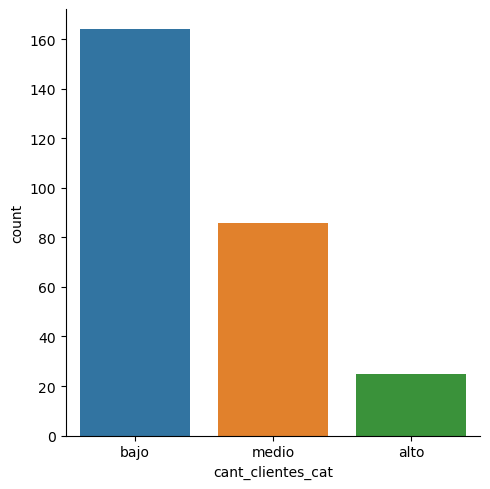

In [258]:
(
    sns.catplot(
        data = df_barrios,
        x = 'cant_clientes_cat',
        kind = 'count'
    )
)

Analizando las categorías asignadas de acuerdo al estrato socioeconómico:

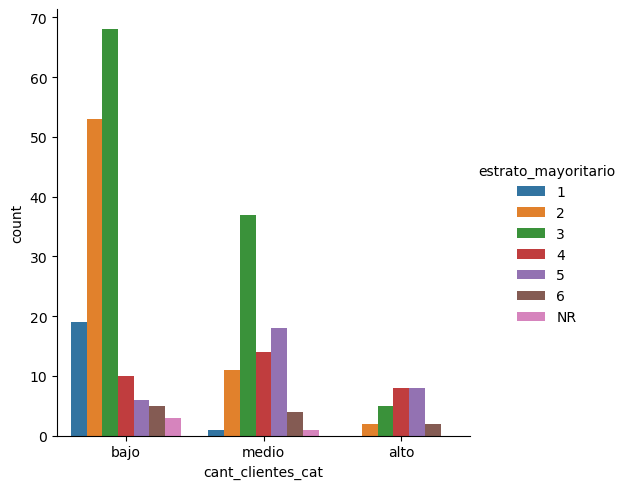

In [257]:
(
    sns.catplot(
        data = df_barrios,
        x = 'cant_clientes_cat',
        kind = 'count',
        hue = 'estrato_mayoritario'
    )
)

**2.3.2 Estrategias propuestas**